In [58]:
import re
import random
import pandas as pd
import hashlib

In [59]:
with open('certcards2.txt', mode='r', encoding='utf8') as f:
    all_cards = f.read()
    
card_split_pattern = r'\n\n\n\d+\n'
all_cards = re.split(card_split_pattern, all_cards)
# Use re.DOTALL to allow . to match newline characters
card_pattern = re.compile(r'(.+?)\n([\s\S]+)', re.DOTALL)
cards = [(match.group(1), match.group(2)) for cstring in all_cards if (match := re.search(card_pattern, cstring))]

# removing the cards that have no content and trimming
cards = [(subject, stripped_content) for subject, content in cards if len(stripped_content := content.strip()) > 5]

def hash_string_md5(s):
    """
    Hashes a string using MD5 and returns a truncated hash for efficiency.

    Parameters:
    - s (str): The input string to hash.

    Returns:
    - str: The truncated hexadecimal hash string.
    """
    if pd.isnull(s):
        return None  # Handle NaN values gracefully
    return hashlib.md5(s.encode('utf-8')).hexdigest()  # Truncate to first 12 characters


def remake_card_document(existing_cards: pd.DataFrame, filename: str='certcards2.txt'):
    with open(filename, mode='w', encoding='utf8') as f:
        i = 1
        for _, row in existing_cards.iterrows():
            print(i)
            f.write('\n'*6)
            f.write(str(i)+'\n')  
            f.write(row['head']+'\n')
            f.write(row['body'])
            i+=1
            # print(F"{row['head']}: {row['age']:.4f}")


existing_cards = pd.DataFrame(cards, columns=['head', 'body'])


# existing_cards['age'] = [random.random() for _ in existing_cards.index]
existing_cards['hash'] = existing_cards['body'].apply(hash_string_md5)
existing_cards

card_ages = pd.read_json('card_ages.json')
# found_cards = pd.DataFrame(cards, columns=['head', 'body'])
# found_cards['hash'] = found_cards['body'].apply(hash_string_md5)

cards_to_age = pd.merge(
    left=existing_cards,
    right=card_ages[['hash', 'age']],
    left_on='hash', right_on='hash',
    how='left'
)

cards_to_age['head'] = cards_to_age['head'].str.strip()

cards_to_age['age'] = cards_to_age['age'].fillna(0)
cards_to_age['age'] = cards_to_age['age'] * 1.05
cards_to_age['age'] = cards_to_age['age'] + [random.random() for _ in cards_to_age.index]

cards_to_age.drop_duplicates(subset=['hash'], keep='first')
cards_to_age.to_json('card_ages.json', indent=2)

existing_cards = cards_to_age

In [68]:
existing_cards.groupby('head')['age'].sum().sort_values()

head
Jane Eyre                           54.824255
OData                              105.320527
RAG                                107.764289
OAuth2.0                           111.323898
numpy                              114.983841
Power Platform                     116.201837
Developer Mode                     148.147443
Azure Functions Quickstart         148.963548
AKS                                155.413777
Kaggle                             157.193837
Dataverse Plugins                  166.428422
Dataverse                          185.094066
Azure OpenAI                       192.769462
OData Requests                     197.263528
Git                                203.014476
Azure Storage                      205.008609
Azure VDI Project                  217.105732
Diffusers Documentation            232.013931
Workera.ai                         243.089890
Conditional Access                 247.311801
Diffusers from Hugging Face        254.856105
General                      

<Axes: >

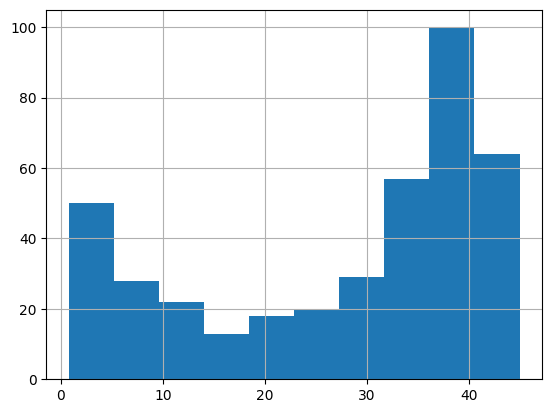

In [61]:
existing_cards['age'].hist()

# Completely Random Shuffle

In [62]:

existing_cards = existing_cards.sample(frac=1)

remake_card_document(filename='certcards2.txt', existing_cards = existing_cards)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Age Shuffle

In [63]:
# existing_cards = existing_cards.sort_values('age', ascending=False)
# remake_card_document(filename='certcards2.txt', existing_cards=existing_cards)

In [64]:
existing_cards[['head', 'age']].head(n = 10)

,head,age
95,Diffusers Library,40.280358
102,Workera.ai,39.339659
177,Kaggle,36.370813
309,Search Engine Optimization,11.134458
82,Azure Functions Quickstart,40.351770
376,DNS,2.941695
246,Azure Functions,28.962925
285,Kali Linux,23.775156
170,MS Identity Platform,35.116319
248,MS Identity Platform,29.622322


# Headers with fewest notes first

In [65]:
# frequency = existing_cards['head'].value_counts(ascending=True)
# print(frequency)

# existing_cards = pd.merge(
#     left=existing_cards,
#     right=frequency.rename('frequency'),
#     left_on='head', right_index=True,
#     how='left'
# )
# existing_cards.sort_values(['frequency', 'head'], ascending=True, inplace=True)

# remake_card_document(filename='certcards2.txt', existing_cards=existing_cards)

In [66]:
existing_cards['head'].value_counts()

DNS                               36
Azure Kubernetes Learning Path    34
Diffusers Library                 29
Search Engine Optimization        29
Python                            27
sklearn                           21
Azure Functions                   19
OData                             17
MS Identity Platform              13
Power BI                          12
Kali Linux                        11
Jane Eyre                         10
PP365                             10
Diffusers from Hugging Face       10
Dataverse Queries                  8
Azure AI Search                    8
AKS                                8
pandas                             8
General                            7
Workera.ai                         7
Conditional Access                 7
Dataverse Plugins                  7
Azure VDI Project                  6
Diffusers Documentation            6
Git                                6
Azure OpenAI                       6
Azure Storage                      5
O

# Focus on one header

In [67]:
# heads = existing_cards['head'].value_counts()
# heads = heads[heads > 5].index.tolist()
# one_header = random.sample(heads, 1)[0]
# existing_cards['pick_head'] = existing_cards['head'].apply(
#     lambda h: 0 if h == one_header else 1 
# )

# remake_card_document(existing_cards=existing_cards.sort_values('pick_head'))